In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Lista1Q3.xls")

In [3]:
model = sm.tsa.UnobservedComponents(data['x'].astype(float), 'local level')
est = model.fit()

In [4]:
print(est.summary())

                        Unobserved Components Results                         
Dep. Variable:                      x   No. Observations:                  100
Model:                    local level   Log Likelihood                -337.663
Date:                Mon, 01 Jun 2020   AIC                            679.327
Time:                        21:41:27   BIC                            684.517
Sample:                             0   HQIC                           681.427
                                - 100                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    11.3152      6.440      1.757      0.079      -1.308      23.938
sigma2.level        33.4396     10.741      3.113      0.002      12.387      54.492
Ljung-Box (Q):              

In [5]:
att = est.filter_results.filtered_state
Ptt = est.filter_results.filtered_state_cov

In [6]:
alpha_hat = est.smoother_results.smoothed_state
V = est.smoother_results.smoothed_state_cov

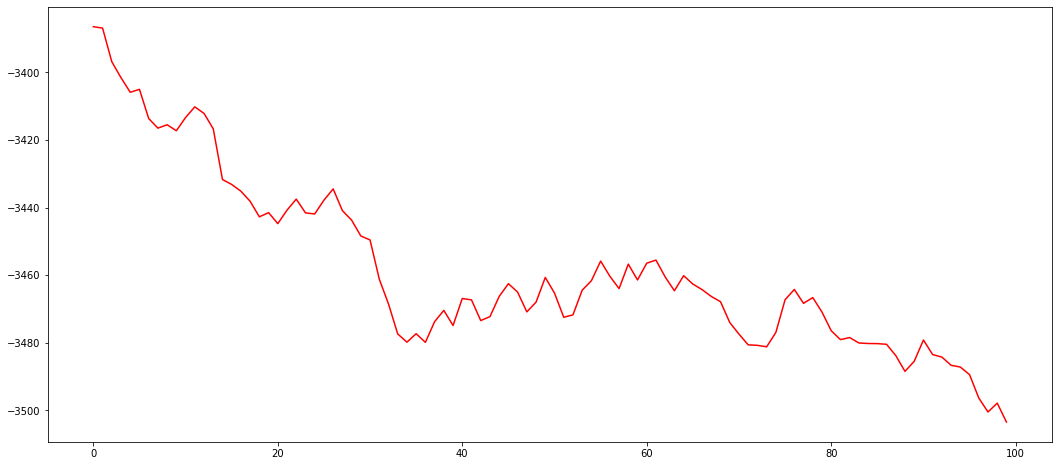

In [7]:
x1 = range(0,alpha_hat.shape[1])
fig, axes = plt.subplots(1, 1, figsize=(18, 8))
axes.plot(x1, alpha_hat[0], 'r') 

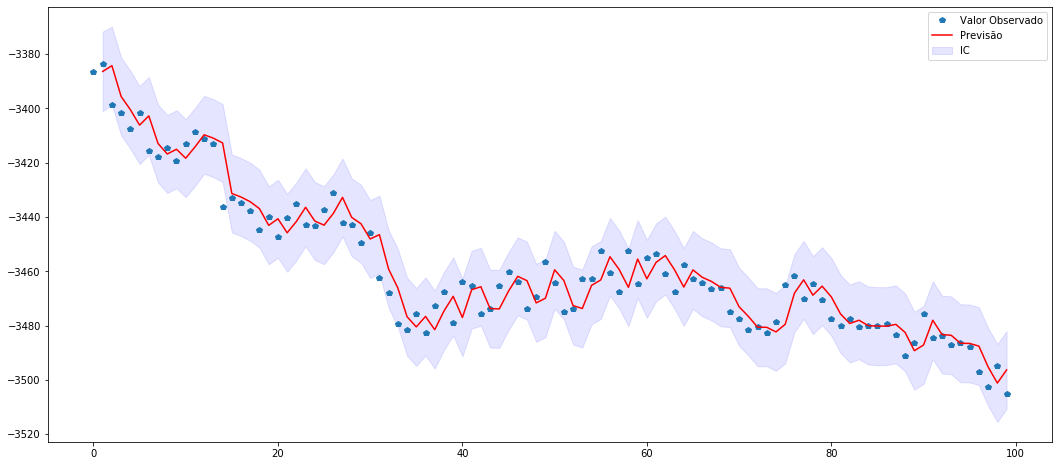

In [8]:
prev_in = est.get_prediction()
prev = prev_in.predicted_mean
se_prev = prev_in.se_mean
lsup = prev + 1.96*se_prev
linf = prev - 1.96*se_prev
x1 = range(0,len(prev))
fig, axes = plt.subplots(1, 1, figsize=(18, 8))
axes.plot(x1, data['x'], 'p', label = 'Valor Observado') 
axes.plot(x1[1:], prev[1:], 'r', label = 'Previsão')
axes.fill_between(x1[1:], linf[1:], lsup[1:], color='b', alpha=.1, label = 'IC')
axes.legend()

In [9]:
# Jarque-Bera: [test_statistic, pvalue, skewness, kurtosis]
jac = est.test_normality(method='jarquebera')
# Goldfeld-Quandt type test: [test_statistic, pvalue]
Gold = est.test_heteroskedasticity(method='breakvar')
# Ljung-Box test: [test_statistic, pvalue] for each lag
Ljung = est.test_serial_correlation(method='ljungbox')

In [10]:
fore = est.get_forecast(steps = 20)
prev_out = fore.predicted_mean
se_out = fore.se_mean
lsup = prev_out + 1.96*se_out
linf = prev_out - 1.96*se_out

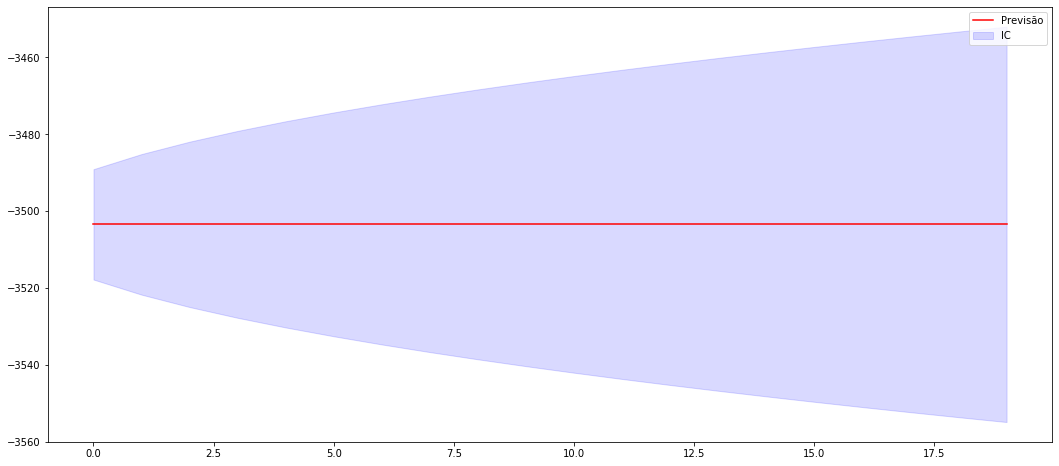

In [11]:
x1 = range(0,len(prev_out))
fig, axes = plt.subplots(1, 1, figsize=(18, 8))
axes.plot(x1, prev_out, 'r', label = 'Previsão')
axes.fill_between(x1, linf, lsup, color='b', alpha=.15, label = 'IC')
axes.legend()

In [12]:
colunas = ['yt', 'att', 'Ptt', 'alpha_hat', 'Vt']
tabela = np.c_[data['x'], att[0].T, Ptt[0].T, alpha_hat[0].T, V[0].T]
tabela = pd.DataFrame(tabela, columns=colunas).iloc[1:]
tabela.head()

,yt,att,Ptt,alpha_hat,Vt
1,-3383.704886,-3384.240406,9.031764,-3386.926040,7.444799
2,-3398.632946,-3395.605147,8.934826,-3396.869459,7.378809
3,-3401.746853,-3400.452472,8.930528,-3401.601297,7.375877
4,-3407.651395,-3406.134081,8.930337,-3405.902979,7.375747
5,-3401.823333,-3402.731911,8.930329,-3405.037616,7.375741
